#    TP03: Régression logistique

 La ***régression logistique*** est une autre technique supervisé utilisé en machine learning. C'est la méthode de classification pour les problèmes avec deux classes(0/1).
 
 ## I-Algorithm du Gradient de descent
 
 -***Hypothèses***: $h_\theta(x)= \frac{1}{1+\exp(-\theta^Tx)}$
 
 $h_\theta(x)> 0,5 $  quand la classe (étiquette) vaut $Y=1$.
    
$h_\theta(x) < 0,5$  quand la classe (étiquette) vaut $Y=0$.
 
 ***Paramètres du model***: $\theta$ avec $m$ examples, $n $ variables
 
***Fonction du coût***:$J(\theta)=-\frac{1}{m}\sum_{i=0}^{m} y(i)\log(h_\theta(x(i)))+(1-y(i)) \log(1-h_\theta(x(i))$
 
***Objectif***: Trouver les meilleurs paramètres $\theta$  revient à minimiser  la fonction du coût.
		$	\min_{\theta}J(\theta)$	
		
		
***Algorithme du Gradient de descent***: $ \theta_j=\theta_j-\alpha	\frac{1}{m}\sum_{i=0}^{m} (h_\theta(x(i))-y(i))x_j(i)$


### 1. Recuperation des données
#### ***Q1***
   -utilisez la fonction ***make_blobs(n_samples,centers, cluster_std,random_state)*** du module ***sklearn.datasets*** pour generer deux classes puis visualiser les deux classes comme suivants:
*   rouge: y=0
*   blue: y=1
<img src="log.png" style="with:150px;height:280px"/>

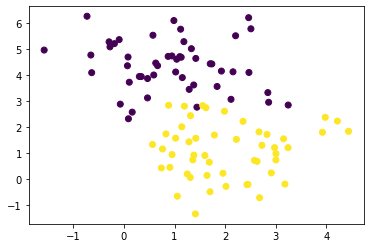

In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
X, Y = make_blobs(n_samples=100 , centers=2, n_features=2 , random_state=0)
plt.scatter(X[:,0] , X[:,1] , c = Y)
plt.show()

#### ***Q2***   
          -a)Corriger les dimentions avec np.reshape
      
          -b)Créez la matrice X
          
          -c) Créez le vecteur $\theta$ (initialisé avec des coefficients nuls)

In [2]:
Y = np.reshape(Y , (100 , 1))

In [3]:
X = np.array([[X[i][0] , X[i][1], 1 ] for i in range(len(X))])

In [4]:
theta = np.zeros((X.shape[1], 1))
theta

array([[0.],
       [0.],
       [0.]])

### 2. Implémentation du modèle et évaluation
 ####  ***Q1***
 
       

 a) Implémenter la ***fonction sigmoid*** $h_\theta(x)= \frac{1}{1+\exp(-X\theta)}$
 
 b) Ecrire la ***Fonction du coût***:$J(\theta)=-\frac{1}{m}\sum_{i=0}^{m} y(i)\log(h_\theta(x(i)))+(1-y(i)) \log(1-h_\theta(x(i))$
 
 c) Ecrire un script qui définit la fonction du gradiant $$ \frac{\delta J(\theta)}{\delta \theta}=\frac{1}{m}X^T.(X.\theta-y)$$
 
 d) Implementer la descente de gradient en utilisant de gradiant:
$$ \theta\leftarrow \theta- \alpha\frac{\delta J(\theta)}{\delta \theta}$$
 
 e) Trouver les valeurs de $\theta$ pour un learning rate $\alpha=0.1$ et un nombre d'itérations de $150$

In [5]:
def sigmoid(X , theta):
    return 1 / (1 + np.exp(-(X.dot(theta))))

In [6]:
def cost_function(theta , X , Y):
    return -(1 / len(Y)) * np.sum(Y * np.log(sigmoid(X, theta)) + (1 - Y) * np.log(1 - sigmoid(X, theta)))

In [7]:
def function_grad(X , Y , theta):
    return (1 / len(Y)) * X.T.dot((X.dot(theta)) - Y)

In [8]:
def descente_grad(X , Y , theta , a):
    return theta - (a * function_grad(X , Y , theta))

In [9]:
nombre_detteration = 1000
alfa = 0.1
cost_func = []
for i in range(nombre_detteration):
    theta = descente_grad(X , Y , theta, alfa)
    cost_func.append(cost_function(theta, X ,Y))
    print(theta.reshape(-1))

[0.10194511 0.0548148  0.05      ]
[0.14304927 0.00355674 0.06484589]
[ 0.1834465  -0.00810552  0.08601202]
[ 0.2100125  -0.02534565  0.10219701]
[ 0.23014873 -0.03631349  0.11748418]
[ 0.24430094 -0.04566479  0.13121753]
[ 0.25431638 -0.05288125  0.14400695]
[ 0.26113325 -0.05876216  0.15598421]
[ 0.26558819 -0.06355555  0.16734519]
[ 0.26826966 -0.06755179  0.17820859]
[ 0.26963083 -0.07093803  0.18867234]
[ 0.27000825 -0.07386388  0.19880773]
[ 0.26965539 -0.07643898  0.20866938]
[ 0.26876208 -0.07874648  0.21829835]
[ 0.26747079 -0.08084857  0.22772588]
[ 0.2658883  -0.08279206  0.23697569]
[ 0.26409468 -0.08461212  0.24606592]
[ 0.26214991 -0.08633519  0.25501051]
[ 0.26009894 -0.08798117  0.26382021]
[ 0.25797538 -0.08956505  0.27250341]
[ 0.2558044  -0.09109812  0.28106671]
[ 0.25360479 -0.0925889   0.28951536]
[ 0.25139056 -0.09404386  0.2978536 ]
[ 0.24917216 -0.09546787  0.30608491]
[ 0.24695733 -0.09686466  0.31421217]
[ 0.24475182 -0.09823707  0.32223786]
[ 0.24255984 -0.09

[ 0.06498633 -0.2056533   0.96020402]
[ 0.06492156 -0.20569194  0.96043364]
[ 0.06485757 -0.20573011  0.9606605 ]
[ 0.06479436 -0.20576782  0.96088462]
[ 0.06473191 -0.20580508  0.96110605]
[ 0.06467021 -0.20584189  0.9613248 ]
[ 0.06460925 -0.20587826  0.96154092]
[ 0.06454903 -0.20591418  0.96175443]
[ 0.06448953 -0.20594968  0.96196537]
[ 0.06443075 -0.20598475  0.96217377]
[ 0.06437268 -0.20601939  0.96237965]
[ 0.06431531 -0.20605362  0.96258306]
[ 0.06425863 -0.20608743  0.96278401]
[ 0.06420263 -0.20612084  0.96298255]
[ 0.06414731 -0.20615384  0.96317868]
[ 0.06409266 -0.20618645  0.96337246]
[ 0.06403866 -0.20621866  0.9635639 ]
[ 0.06398532 -0.20625049  0.96375303]
[ 0.06393261 -0.20628193  0.96393989]
[ 0.06388055 -0.20631299  0.96412449]
[ 0.06382911 -0.20634368  0.96430687]
[ 0.06377829 -0.206374    0.96448705]
[ 0.06372808 -0.20640395  0.96466505]
[ 0.06367848 -0.20643354  0.96484092]
[ 0.06362947 -0.20646278  0.96501466]
[ 0.06358106 -0.20649166  0.96518631]
[ 0.06353323

[ 0.05979912 -0.20874792  0.97859489]
[ 0.05979687 -0.20874926  0.97860288]
[ 0.05979464 -0.20875059  0.97861077]
[ 0.05979245 -0.2087519   0.97861857]
[ 0.05979027 -0.2087532   0.97862627]
[ 0.05978813 -0.20875448  0.97863388]
[ 0.05978601 -0.20875575  0.9786414 ]
[ 0.05978391 -0.208757    0.97864882]
[ 0.05978184 -0.20875823  0.97865616]
[ 0.0597798  -0.20875945  0.97866341]
[ 0.05977778 -0.20876065  0.97867057]
[ 0.05977578 -0.20876185  0.97867765]
[ 0.05977381 -0.20876302  0.97868464]
[ 0.05977186 -0.20876418  0.97869155]
[ 0.05976994 -0.20876533  0.97869837]
[ 0.05976804 -0.20876647  0.97870511]
[ 0.05976616 -0.20876759  0.97871177]
[ 0.0597643  -0.20876869  0.97871835]
[ 0.05976247 -0.20876979  0.97872485]
[ 0.05976066 -0.20877087  0.97873127]
[ 0.05975887 -0.20877194  0.97873761]
[ 0.0597571  -0.20877299  0.97874388]
[ 0.05975535 -0.20877403  0.97875007]
[ 0.05975363 -0.20877506  0.97875619]
[ 0.05975192 -0.20877608  0.97876224]
[ 0.05975024 -0.20877708  0.97876821]
[ 0.05974857

[ 0.05961773 -0.20885614  0.979238  ]
[ 0.05961766 -0.20885618  0.97923824]
[ 0.0596176  -0.20885622  0.97923848]
[ 0.05961753 -0.20885625  0.97923871]
[ 0.05961747 -0.20885629  0.97923894]
[ 0.0596174  -0.20885633  0.97923916]
[ 0.05961734 -0.20885637  0.97923939]
[ 0.05961728 -0.20885641  0.97923961]
[ 0.05961722 -0.20885644  0.97923982]
[ 0.05961716 -0.20885648  0.97924004]
[ 0.0596171  -0.20885651  0.97924025]
[ 0.05961704 -0.20885655  0.97924046]
[ 0.05961698 -0.20885658  0.97924067]
[ 0.05961692 -0.20885662  0.97924088]
[ 0.05961686 -0.20885665  0.97924108]
[ 0.05961681 -0.20885669  0.97924128]
[ 0.05961675 -0.20885672  0.97924148]
[ 0.0596167  -0.20885675  0.97924167]
[ 0.05961664 -0.20885679  0.97924186]
[ 0.05961659 -0.20885682  0.97924206]
[ 0.05961653 -0.20885685  0.97924224]
[ 0.05961648 -0.20885688  0.97924243]
[ 0.05961643 -0.20885691  0.97924261]
[ 0.05961638 -0.20885694  0.9792428 ]
[ 0.05961633 -0.20885697  0.97924298]
[ 0.05961628 -0.208857    0.97924315]
[ 0.05961623

 ####  ***Q2***
 
 a) Evaluer le modèle en calculant le coefficient de corrélation
 
 b) Tracer la courbe d'apprantissage

In [10]:
Y_predect = sigmoid(X , theta)

In [11]:
def coef_determination(y , pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

### 3. Prédiction

A quelle classe apartient les deux points suivants: x1=(1,5); x2(3,1) 

In [12]:
x1 = np.array([[1 , 5 , 1] , [3 ,1 , 1]])
result = sigmoid(x1 , theta)
last = []
for i in result:
    if i > 0.5 :
        last.append(1)
    elif i < 0.5 :
        last.append(0)
last

[0, 1]

In [13]:
def which_class(test):
    if test > 0.5:
        return 1
    return 0

In [14]:
last_result = []
for i in Y_predect:
    last_result.append(which_class(i))

In [15]:
coef_determination(Y , Y_predect)

0.24866570230552965

## II- Utilisation des modules python
### 1. Récuperation des données
Les données sont stocker dans le fichier banking.csv. Ce dataset contient des information collecter par un centre d'appel pour savoir si un client souscrira (1/0) à un dépôt à terme (variable y) dans une baque.

1-Recuperer les données de ce fichier dans un DataFrame data

2-Afficher les 10 premiere ligne de ce dataframe

3-Afficher le nombre de client par class (1/0)

In [16]:
import pandas as pd
db = pd.read_csv("./Start/banking.csv")
db.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
5,30,management,divorced,basic.4y,no,yes,no,cellular,jul,tue,...,8,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
6,37,blue-collar,married,basic.4y,no,yes,no,cellular,may,thu,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,0
7,39,blue-collar,divorced,basic.9y,no,yes,no,cellular,may,fri,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
8,36,admin.,married,university.degree,no,no,no,cellular,jun,mon,...,1,3,1,success,-2.9,92.963,-40.8,1.266,5076.2,1
9,27,blue-collar,single,basic.4y,no,yes,no,cellular,apr,thu,...,2,999,1,failure,-1.8,93.075,-47.1,1.410,5099.1,0


In [17]:
db["y"].value_counts()
# db.describe()

0    36548
1     4640
Name: y, dtype: int64

### 2- Entrainement et test du modèle
Dans un premier lieux, nous allons utiliser comme critères de classifiction suivants:
"age": l'age du client
"emp_var_rate": employment variation rate
"cons_conf_idx": consumer confidence index

1- Creer deux numpy array X et y

X: les trois colonne "age","emp_var_rate" et "cons_conf_idx"

y: "y"

2- Nous allons utiliser **80%** du dataSet pour l'entrainement et **20%** pour le teste du modèle. utiliser la méthode **train_test_split()** du module **sklearn.model_selection** pour créer ces deux sous ensembles (X_train,X_test,y_train,y_test).

3- Creer un objet **LogisticRegression** du module **sklearn.linear_model** et utiliser **(X_train,y_train)** pour entrainer le model à l'aide la méthode **fit()** du même objet.

4- Utiliser la méthode **predict(X_test)** pour predire les classe des élément de X_test : y_pred

5- Les performences du modele sont alors mesurer à l'aide 4 metriques:
**TP: Nombre de True positives y_test==y_pred==1**

**TN: Nombre de True negatives y_test==y_pred==0**

**FP: Nombre de False positives y_test!=y_pred==1**

**FN: Nombre de False negatives y_test!=y_pred==0**


**$$Accuracy = (TP+TN)/(TP+TN+FP+FN) $$**

Calculer la precision de ce modèle?

6- Ces 4 metriques forment ce qu'on appel une **Confusion Matrix** disponible comme méthode dans le module **sklearn.metrics** :  **Confusion Matrix(y_test, y_pred)**

Recalculer precision de ce modèle on utilisant cette matrice de confusion

In [18]:
X = np.array([[i , j , z] for  i , j , z in zip (db["age"].to_list() , db["emp_var_rate"].to_list() , db["cons_price_idx"].to_list())])
Y = np.array([i for i in db['y'].to_list()])

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.75, random_state=0)

In [20]:
from sklearn.linear_model import LogisticRegression
cfs = LogisticRegression().fit(X_train, Y_train)

In [21]:
new_predect = cfs.predict(X_test)

In [22]:
cfs.score(X_train, Y_train)

0.8843352432747402

### 3- prediction
Voici des information de trois clients:

client1:  {"age": 55, "emp_var_rate": -2.9, "cons_conf_idx": 31.4}

client2:  {"age": 45, "emp_var_rate": 3.7,"cons_conf_idx": 4}

client3:  {"age": 39, "emp_var_rate": 3.3,"cons_conf_idx": 6}

1- Créer un DataFrame à partir de ce données

2- Lequel de ces client souscrira à un dépôt à terme

In [23]:
data = {
    'client1': [55,-2.9 , 31.4],
    'client2': [45, 3.7 , 4],
    'client3': [39, 3.3 , 6]
}

test = pd.DataFrame(pd.DataFrame.from_dict(data, orient='index',  columns=['age', 'emp_var_rate', 'cons_conf_idx']))

In [24]:
new_X_test = np.array([[i , j , z] for  i , j , z in zip (test["age"].to_list() , test["emp_var_rate"].to_list() , test["cons_conf_idx"].to_list())])
test_predect = cfs.predict(new_X_test)

In [25]:
test_predect

array([1, 0, 0])